In [28]:
import os
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import backend as k
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.image import imread

In [2]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'C:/Users/kashyap.gaglani/Documents/Data/DevanagariHandwrittenCharacterDataset/train'
validation_data_dir = 'C:/Users/kashyap.gaglani/Documents/Data/DevanagariHandwrittenCharacterDataset/Test'

In [3]:
#import data
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=1024,
        class_mode='categorical')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=1024,
        class_mode='categorical')

Found 17000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


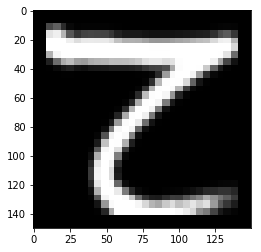

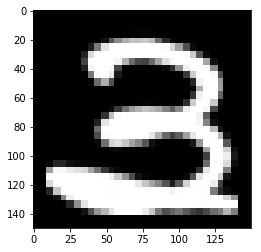

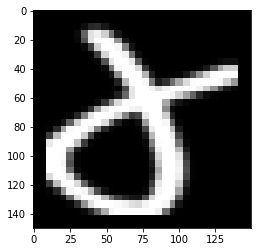

In [34]:
x,y = train_generator.next()
for i in range(0,3):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [8]:
model = Sequential()
model.add(Convolution2D(32,(3,3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
nb_epoch = 2
nb_train_samples = 17000
nb_validation_samples = 3000
batchsize = 1024
                    
                    
model.fit_generator(train_generator,steps_per_epoch=16,epochs=2,validation_data=validation_generator,validation_steps=3)


Epoch 1/2
11/16 [===================>..........] - ETA: 1283s - loss: 2.2363 - acc: 0.1424